<h1 style="text-align: center;">One-dimensional particle motion simulation</h1>

# 1. Idea

We start with the simplest of one-dimensional systems. Suppose there are 10 points on a line, we can take 10 random points on an x-axis and use them as coordinates, and these points represent the positions of the particles.Then, there are forces interacting between these particles, and the forces are causing the particles to gain acceleration and thus displacement. This is the principle of this simple model, but we may also need to add a boundary to it so that the motion of the particles can eventually stabilise.

# 2. Detail
## 2.1 Randomly generated particle coordinates
We can randomly generate the coordinates of 10 particles by

In [49]:
import random

def Initial_position(n):
    random.seed(40)
    random_position = [random.uniform(0, 10) for _ in range(n)]
    random_position.sort()
    return random_position

Initial_position(10)

[0.31846480408982525,
 1.2837236942357588,
 2.824261461537926,
 3.483892327332404,
 4.407622204637107,
 4.586067093870614,
 6.64318734454616,
 8.7786790373901,
 8.797493185344203,
 9.617911699198027]

The 'random.uniform' function is used to select non-repeating random elements from a specified range and returns a list, and '(range(1, 100), n)' specifies that a list of floats between 1 and 100 is to be generated.

'random_position.sort()' sorts the generated list of random integers. '.sort()' is a method of the list object that sorts the elements of the list in ascending order.

To make the random numbers generated the same for each run, the random.seed() function is used here, where 40 is the value of the seed, which can be any integer. By setting the seed to the same value, it is guaranteed that the same sequence of random numbers will be generated each time the code is run.

If we wanted to show them in the diagram, they would be

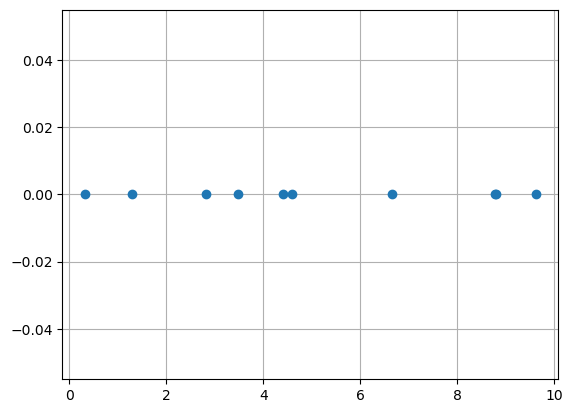

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(p):
    plt.clf()
    ypos = [0 for i in range(len(p))]
    plt.plot(p, ypos, "o")
    plt.grid()
    plt.show()
    
plot(Initial_position(10))

## 2.2 Interaction forces between particles

The interaction forces between the particles are related to the spacing between them and their relationship is given by
$$f(r)=C_1⋅e^{-r/C_2 }$$
r is the distance between two particles, C_1 and C_2 are constants, and we can set them to 1 initially, but we may want to change it later. This means that the further apart the particles are, the less force they have.

But this is only the interaction force between a pair of particles, so we need to calculate the combined force using the 'for loop'.
$$𝐹=𝑓1+𝑓2+⋯+𝑓9$$

In [51]:
import math

# Calculating the force between a pair of particles
def force(r, c1=1, c2=1):
    f = c1 * math.exp(-r / c2)
    return f

# Calculate the total force of repulsion for each particle
def combined_force(p):
    total_force = []
    n = len(p)
    for i in range(n):
        fn_sum = 0
        for j in range(n):
            if j != i:
                r = p[j] - p[i]
                fn = -1 * force(abs(r)) * r / abs(r)
                fn_sum += fn
        total_force.append(fn_sum)
    return total_force

Here, 'len(p)' is used to calculate the number of particles, 'r' represents the distance between a pair of particles, and 'fn = -1 * force(abs(r)) * r / abs(r)' is used to correct for the direction of the force.

## 2.3 Displacement of particles

According to Newton law, there are two forces. F is the total force of the interaction with all the other particles, the other one is negative friction times velocity (the friction resistance).

$$ma=F-ηv$$
                            
In our simple model, suppose the particle has zero mass, so:

$$ηv=F$$

And with velocity, we can introduce the displacement Δx. This represents the displacement of Δx that the particle will produce after every period of time Δt.

$$v=\frac{dr}{dt}=\frac{F}{η}≈\frac{∆x}{∆t}$$
                        
$$∆x=\frac{F}{η}⋅∆t$$

This is the displacement ∆x produced by the particle after each passage of ∆t:

In [52]:
def displacement(total_force, eta=1, delta_t=1):
    displacement = [f / eta * delta_t for f in total_force]
    return displacement

## 2.4 Update the position of particles

For each particle we need to update its position, so here a for loop is used to accumulate the displacement of each particle. But here a boundary condition needs to be added that the position of the particle always stays within (0,10).

In [53]:
def update_position(p, delta_r, min_x=0, max_x=10):
    new_p = []
    for i in range(len(p)):
        new_xpos = p[i] + delta_r[i]
        if new_xpos > max_x:
            new_xpos = max_x
        elif new_xpos < min_x:
            new_xpos = min_x
        new_p.append(new_xpos)
    return new_p

## 2.5 Main function

                            
By calculating the displacements at each time step and accumulating them through a for loop, we can obtain the final time displacements

$$x(t_{i+1} )=x(t_i )+∆x(t_i )$$

So ultimately, we can use this method to figure out how particles move over time.

Here, we can string all the functions together in one main function and output the result:

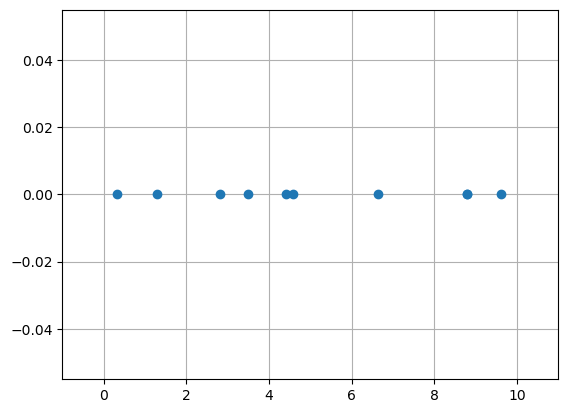

P(0):  [0.31846480408982525, 1.2837236942357588, 2.824261461537926, 3.483892327332404, 4.407622204637107, 4.586067093870614, 6.64318734454616, 8.7786790373901, 8.797493185344203, 9.617911699198027]


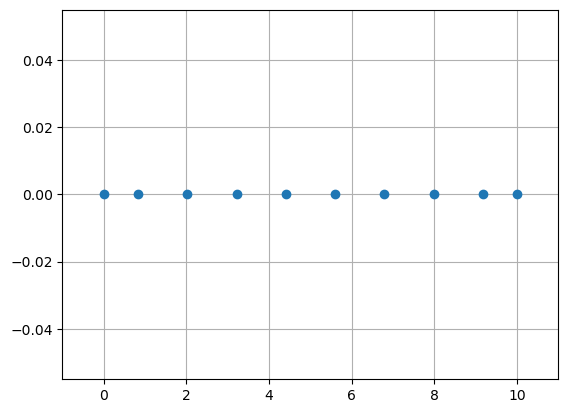

P(200):  [0, 0.8323336708020489, 2.0255416770286656, 3.218261744643321, 4.410384072228611, 5.6018714552085385, 6.792755020641937, 7.9831217163839945, 9.173098542987779, 10]


In [61]:
%matplotlib inline

def simulate(n, time_step, show_plot=True):
    p = Initial_position(n)
    update_plot(p)
    print("P(0): ", p)
    for i in range(time_step):
        total_force = combined_force(p)
        x_det = displacement(total_force, delta_t=0.1)
        p = update_position(p, x_det)
        xpos = p
    update_plot(xpos)
    print("P({}): ".format(time_step), p)
    
def update_plot(xpos):
    plt.clf()
    ypos = [0 for i in range(len(xpos))]
    plt.plot(xpos, ypos, "o")
    plt.xlim(left=-1, right=11)
    plt.grid()
    plt.draw()
    plt.pause(0.0001)
    
simulate(10, 200, show_plot=True)

We can see that after 1000 time steps the particles tend to stabilise and are regularly distributed on the x-axis.

# 3. Full code

Here is the full code for the 1D particle simulation, but I have modified the diagram output here so that we will be able to see the particles change a little bit with the time step. (These code need use matplotlib backend: Qt5Agg)

In [58]:
%matplotlib
import matplotlib.pyplot as plt
import random
import math

def Initial_position(n):
    random.seed(40)
    random_position = [random.uniform(0, 10) for _ in range(n)]
    random_position.sort()
    return random_position

def plot(p):
    plt.clf()
    ypos = [0 for i in range(len(p))]
    plt.plot(p, ypos, "o")
    plt.grid()
    plt.show()

# Calculating the force between a pair of particles
def force(r, c1=1, c2=1):
    f = c1 * math.exp(-r / c2)
    return f

# Calculate the total force of repulsion for each particle
def combined_force(p):
    total_force = []
    n = len(p)
    for i in range(n):
        fn_sum = 0
        for j in range(n):
            if j != i:
                r = p[j] - p[i]
                fn = -1 * force(abs(r)) * r / abs(r)
                fn_sum += fn
        total_force.append(fn_sum)
    return total_force

def displacement(total_force, eta=1, delta_t=1):
    displacement = [f / eta * delta_t for f in total_force]
    return displacement

def update_position(p, delta_r, min_x=0, max_x=10):
    new_p = []
    for i in range(len(p)):
        new_xpos = p[i] + delta_r[i]
        if new_xpos > max_x:
            new_xpos = max_x
        elif new_xpos < min_x:
            new_xpos = min_x
        new_p.append(new_xpos)
    return new_p

def simulate(n, time_step, show_plot=True):
    p = Initial_position(n)
    update_plot(p)
    print("P(0): ", p)
    for i in range(time_step):
        total_force = combined_force(p)
        x_det = displacement(total_force, delta_t=0.1)
        p = update_position(p, x_det)
        xpos = p
        if show_plot:
            if i % 2 == 0:
                update_plot(xpos)
    print("P({}): ".format(time_step), p)
    
def update_plot(xpos):
    plt.clf()
    ypos = [0 for i in range(len(xpos))]
    plt.plot(xpos, ypos, "o")
    plt.xlim(left=-1, right=11)
    plt.grid()
    plt.draw()
    plt.pause(0.0001)
    
simulate(10, 200, show_plot=True)

Using matplotlib backend: Qt5Agg
P(0):  [0.31846480408982525, 1.2837236942357588, 2.824261461537926, 3.483892327332404, 4.407622204637107, 4.586067093870614, 6.64318734454616, 8.7786790373901, 8.797493185344203, 9.617911699198027]
P(200):  [0, 0.8323336708020489, 2.0255416770286656, 3.218261744643321, 4.410384072228611, 5.6018714552085385, 6.792755020641937, 7.9831217163839945, 9.173098542987779, 10]
